# 와인 품질 분류 데이터
* [데이터 출처](https://dacon.io/competitions/open/235610/data)

## 데이터 해석
* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

# load data & library 

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# df = pd.read_csv("../data/MiniP3/WineQT.csv")
# df.shape

In [138]:
train = pd.read_csv("../data/MiniP3/train.csv", index_col="index")
print(train.shape)
train.head()

(5497, 13)


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [139]:
test = pd.read_csv("../data/MiniP3/test.csv", index_col="index")
print(test.shape)
test.head()

(1000, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


# 데이터 타입과 결측치 조회

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [141]:
train.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [142]:
test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

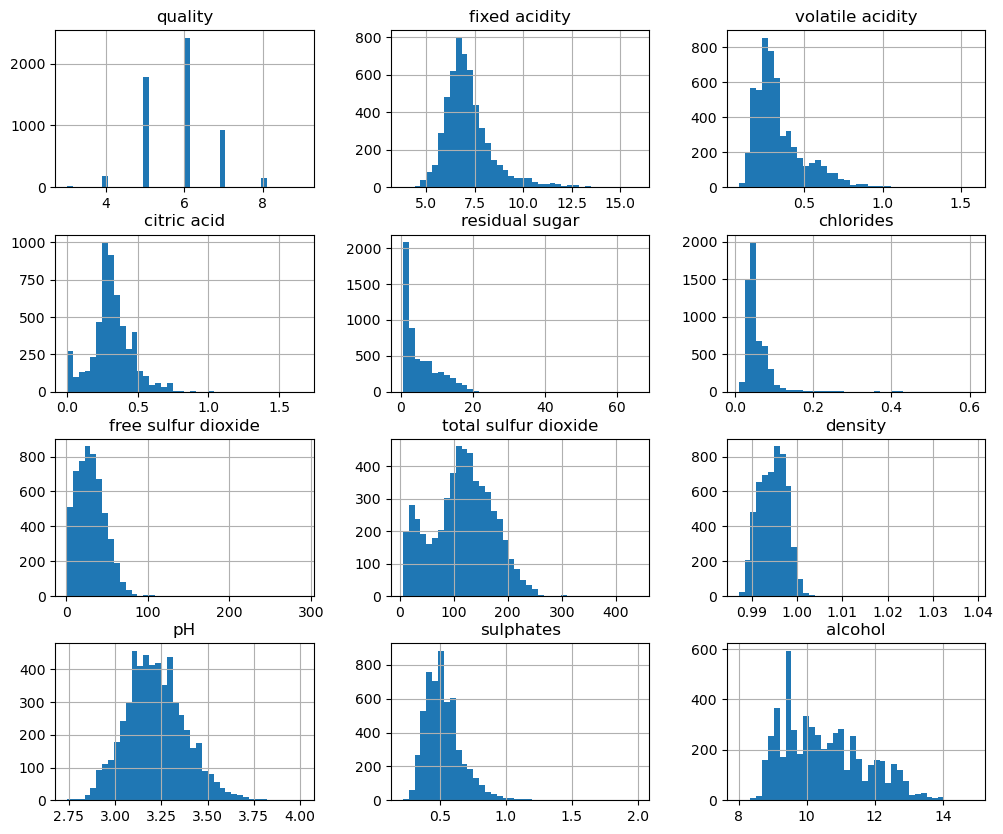

In [143]:
train.hist(figsize=(12, 10), bins=40);

# 와인 등급에 영향을 끼치는 요소
* 관련 지식 전무
* 상관계수를 이용하여 확인해보자

In [144]:
train.corr()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.000000,-0.076506,-0.261557,0.079157,-0.032848,-0.198148,0.055574,-0.039732,-0.299831,0.017931,0.042068,0.439615
fixed acidity,-0.076506,1.000000,0.210180,0.326992,-0.112544,0.303307,-0.277079,-0.323845,0.452161,-0.250462,0.300979,-0.096274
volatile acidity,-0.261557,0.210180,1.000000,-0.377986,-0.192677,0.385431,-0.352572,-0.418535,0.266759,0.264130,0.225174,-0.032897
citric acid,0.079157,0.326992,-0.377986,1.000000,0.135160,0.029121,0.129496,0.190955,0.088400,-0.322100,0.049013,-0.005376
residual sugar,-0.032848,-0.112544,-0.192677,0.135160,1.000000,-0.130339,0.396018,0.494788,0.557183,-0.259673,-0.182275,-0.361457
chlorides,-0.198148,0.303307,0.385431,0.029121,-0.130339,1.000000,-0.193143,-0.281654,0.364200,0.046937,0.400354,-0.259774
free sulfur dioxide,0.055574,-0.277079,-0.352572,0.129496,0.396018,-0.193143,1.000000,0.716829,0.027270,-0.145586,-0.189390,-0.182321
total sulfur dioxide,-0.039732,-0.323845,-0.418535,0.190955,0.494788,-0.281654,0.716829,1.000000,0.039707,-0.234412,-0.272236,-0.271566
density,-0.299831,0.452161,0.266759,0.088400,0.557183,0.364200,0.027270,0.039707,1.000000,0.020047,0.261879,-0.688053
pH,0.017931,-0.250462,0.264130,-0.322100,-0.259673,0.046937,-0.145586,-0.234412,0.020047,1.000000,0.187392,0.114959


In [145]:
mask_train = np.triu(np.ones_like(train.corr()))
mask_train

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

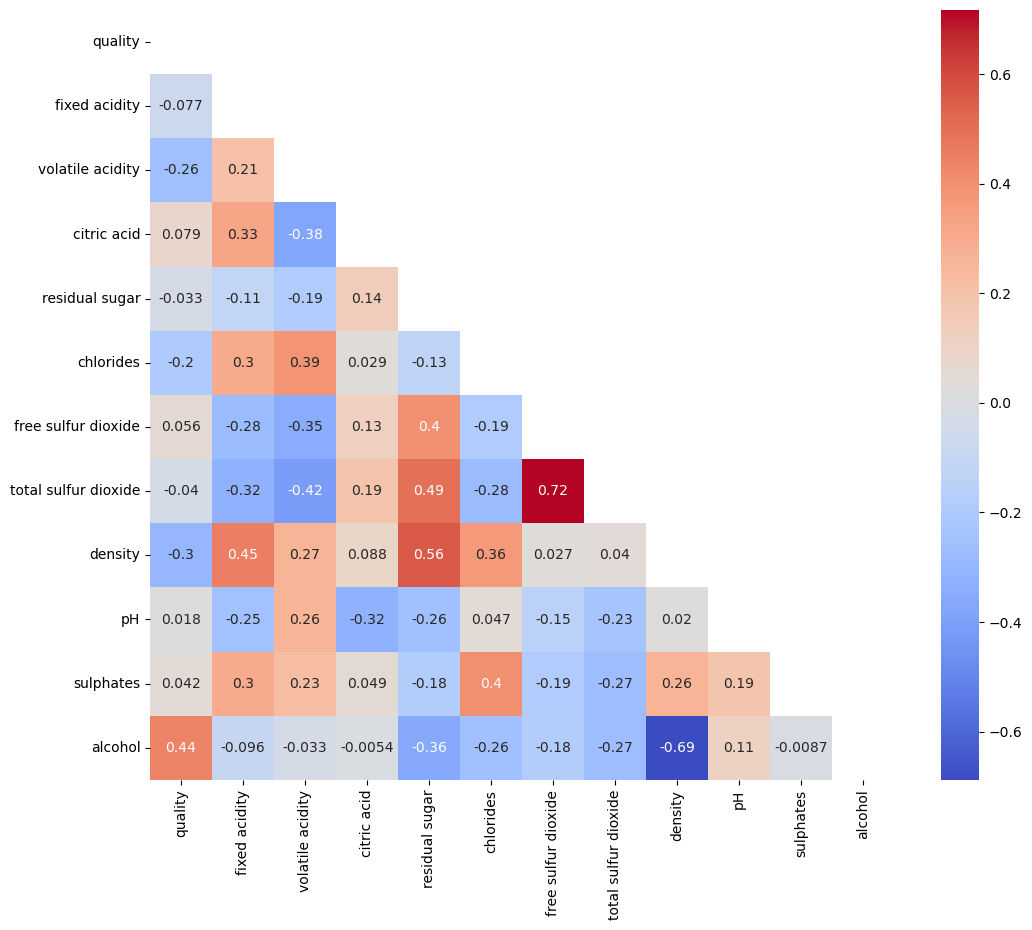

In [146]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), mask=mask_train, cmap='coolwarm', annot=True)

In [168]:
mask_test = np.triu(np.ones_like(test.corr()))
mask_test

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

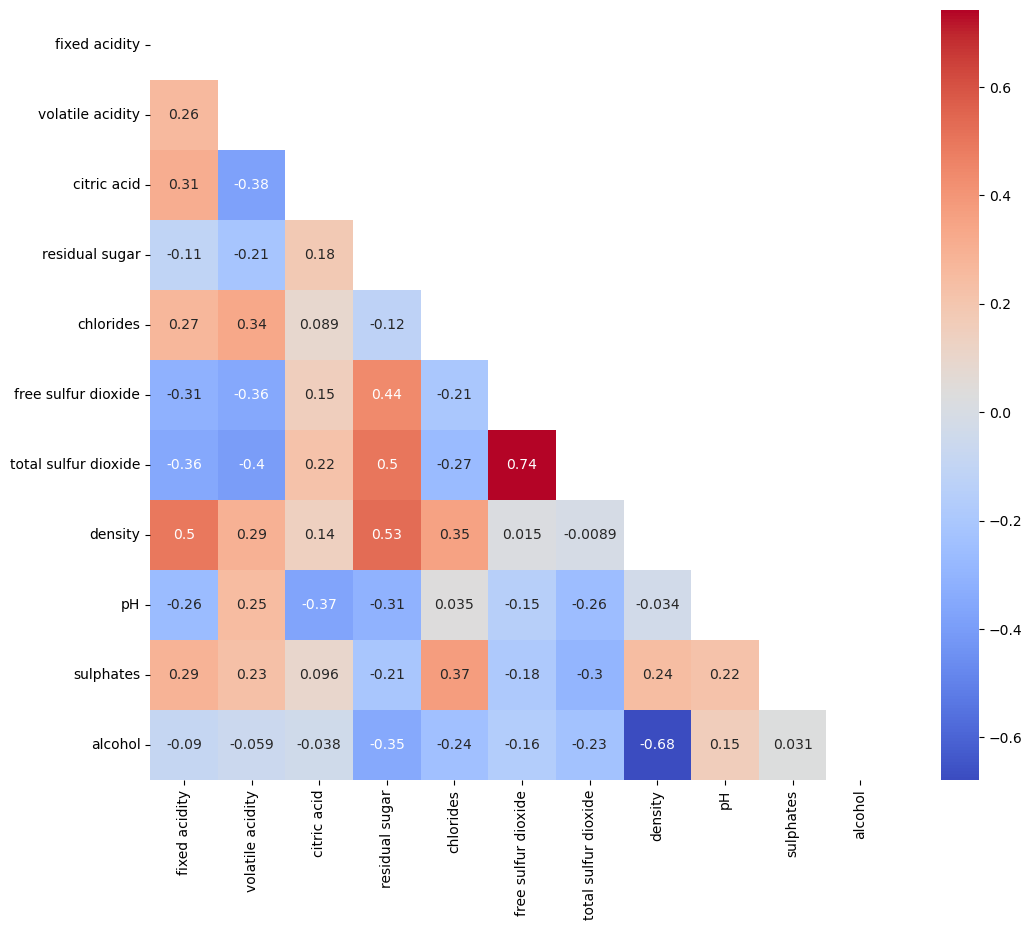

In [170]:
plt.figure(figsize=(12, 10))
sns.heatmap(test.corr(), mask=mask_test, cmap='coolwarm', annot=True)

In [208]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# featrues & label
* features로 quality와 상관계수 |0.1|보다 큰 것만 사용하자 

In [148]:
feature_names = ["volatile acidity", "chlorides", "density", "alcohol"]
feature_names

['volatile acidity', 'chlorides', 'density', 'alcohol']

In [149]:
label = 'quality'
label

'quality'

# train & test

In [230]:
X_train = train[feature_names]
X_train.head()

,volatile acidity,chlorides,density,alcohol
index,,,,
0,0.695,0.042,0.99432,10.2
1,0.610,0.067,0.99690,9.5
2,0.210,0.057,0.99176,10.9
3,0.210,0.046,0.99390,10.8
4,0.400,0.059,0.99550,10.9


In [152]:
y_train = train[label]
y_train.head()

index
0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

In [153]:
X_test = train[feature_names]
X_test.head()

,volatile acidity,chlorides,density,alcohol
index,,,,
0,0.695,0.042,0.99432,10.2
1,0.610,0.067,0.99690,9.5
2,0.210,0.057,0.99176,10.9
3,0.210,0.046,0.99390,10.8
4,0.400,0.059,0.99550,10.9


# ML
* 일단 하이퍼 파라미터 설정 없이 진행 

In [239]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [240]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [241]:
from sklearn.ensemble import RandomForestClassifier

Forest_model = RandomForestClassifier()

In [242]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5)

In [243]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.5759505184646171

# feature importance 시각화

<AxesSubplot:>

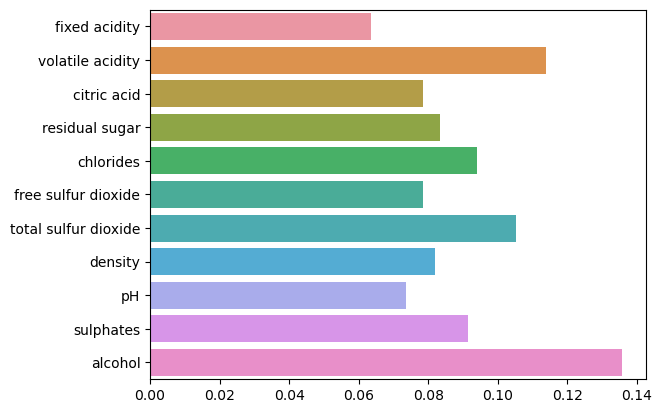

In [220]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

# 똑같은 데이터 셋으로 다른 모델
* 마찬가지로 하이퍼 파라미터 설정 X
* 3~5점 정도의 성능 향상을 보임

## XGBoost

In [231]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_XGB = le.fit_transform(y_train)

In [232]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train_XGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [233]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train_XGB, cv=5)

In [234]:
valid_accuracy = (y_train_XGB == y_valid_predict).mean()
valid_accuracy

0.6088775695834091

## LGBM

In [235]:
from lightgbm import LGBMClassifier

In [236]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [237]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5)

In [238]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.5948699290522103

# feature 재지정하기 위해 시각화

In [177]:
col_list = train.columns.tolist()
col_list

['quality',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

<AxesSubplot:xlabel='quality', ylabel='type'>

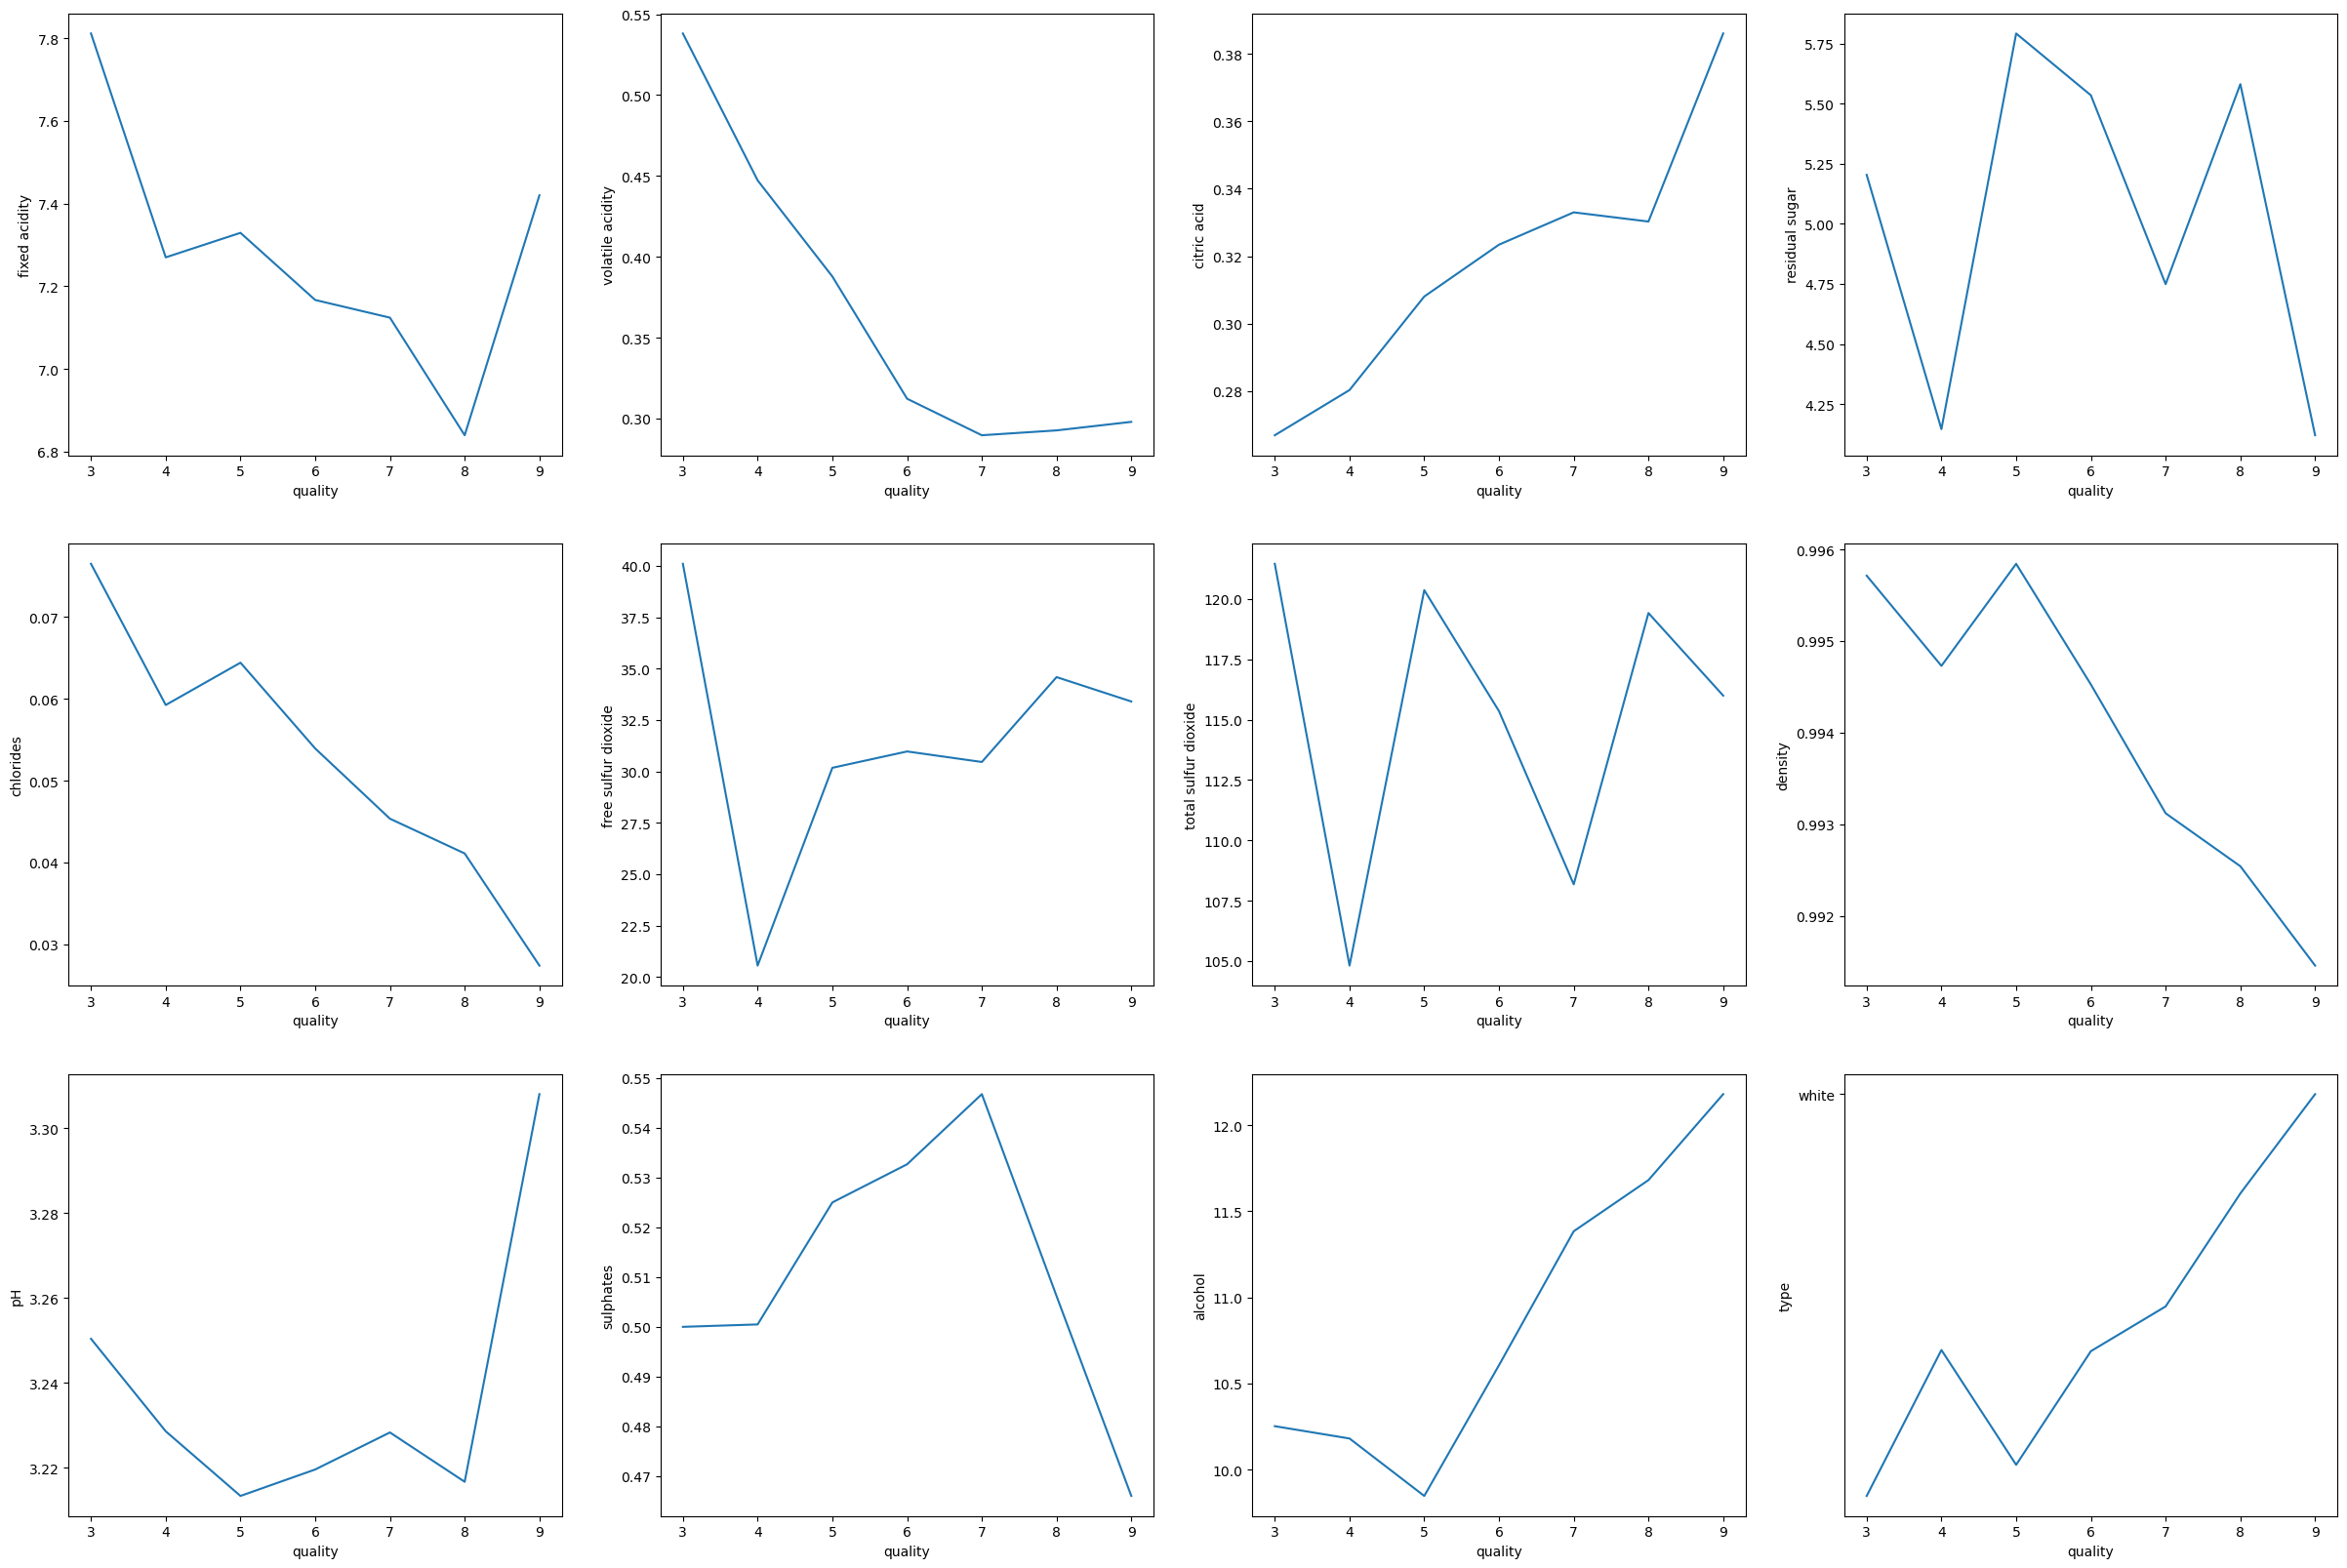

In [196]:
fig, ax = plt.subplots(3, 4, figsize=(30, 20))
sns.lineplot(data=train, x="quality", y=col_list[1], errorbar=None, ax=ax[0, 0])
sns.lineplot(data=train, x="quality", y=col_list[2], errorbar=None, ax=ax[0, 1])
sns.lineplot(data=train, x="quality", y=col_list[3], errorbar=None, ax=ax[0, 2])
sns.lineplot(data=train, x="quality", y=col_list[4], errorbar=None, ax=ax[0, 3])
sns.lineplot(data=train, x="quality", y=col_list[5], errorbar=None, ax=ax[1, 0])
sns.lineplot(data=train, x="quality", y=col_list[6], errorbar=None, ax=ax[1, 1])
sns.lineplot(data=train, x="quality", y=col_list[7], errorbar=None, ax=ax[1, 2])
sns.lineplot(data=train, x="quality", y=col_list[8], errorbar=None, ax=ax[1, 3])
sns.lineplot(data=train, x="quality", y=col_list[9], errorbar=None, ax=ax[2, 0])
sns.lineplot(data=train, x="quality", y=col_list[10], errorbar=None, ax=ax[2, 1])
sns.lineplot(data=train, x="quality", y=col_list[11], errorbar=None, ax=ax[2, 2])
sns.lineplot(data=train, x="quality", y=col_list[12], errorbar=None, ax=ax[2, 3])

# GridSearch

In [79]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(3, 20, 2))
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
parameters = {"max_depth":max_depth, "max_features":max_features}

In [80]:
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=19, max_features=0.9),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]})

In [81]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=19, max_features=0.5)

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy versio